In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/Colab Notebooks/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


In [0]:
import os
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
import csv
import math
import matplotlib.pyplot as plt

from PIL import Image
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

2.2


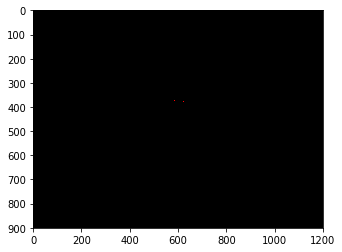

2_3.1
ImageNo = [2_3.1], CentroidX = 997.964964700283, CentroidY = 380.76654591607394
ImageNo = [2_3.1], CentroidX = 319.0662090218129, CentroidY = 509.4428921314981


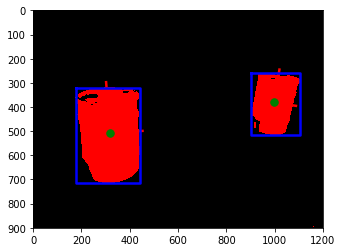

5.1
ImageNo = [5.1], CentroidX = 611.8709034764419, CentroidY = 438.92738320549853


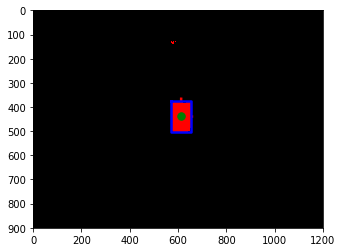

In [34]:
centroid_x = []
centroid_y = []
dist = []
outputs = []

for names in sorted(os.listdir('classified_img/')):
    l = len(names)
    names = names[0:(l-4)]

    print(names)
    
    im = Image.open("classified_img/" + names + ".png")
    img = np.array(im)

    ind = np.zeros((900, 1200))

    for i in range(0, 900):
        for j in range(0, 1200):
            if img[i][j][0] == 255:
                ind[i][j] = 1


    label_img = label(ind)
    regions = regionprops(label_img)

    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.cm.gray)

    ind = 0
    for i in range(0, len(regions)):
        major = regions[ind].major_axis_length
        minor = regions[ind].minor_axis_length
        if regions[ind].bbox_area < 1250 or minor < 5 or (regions[ind].filled_area / regions[ind].bbox_area) < 0.5:
            del regions[ind]
        else:
            if major/minor < 1 or major/minor > 3:
                del regions[ind]
            else:
                ind = ind + 1
 
    if len(regions) != 0:
        size_list = []
        for props in regions:
            size_list.append(props.bbox_area)

        ind = 0
        max_area = max(size_list)
        for i in range(0, len(regions)):
            area = regions[ind].bbox_area
            area_rat = area / max_area
            if area_rat < 0.3:
                del regions[ind]
            else:
                ind = ind + 1

        for props in regions:
            y0, x0 = props.centroid
            orientation = props.orientation

            centroid_x.append(x0)
            centroid_y.append(y0)

            width = 2 * props.minor_axis_length
            

            x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
            y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
            x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
            y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

            ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
            ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
            ax.plot(x0, y0, '.g', markersize=15)

            minr, minc, maxr, maxc = props.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            ax.plot(bx, by, '-b', linewidth=2.5)

            chars = "ImageNo = [" + names + "], CentroidX = " + str(x0) + ", CentroidY = " + str(y0)
            outputs.append(chars)
            print(chars)

    ax.axis((0, 1200, 900, 0))
    plt.show()